**ATOC4500 Data Science Lab - Lecture #4 Notebook** 

*last updated: February 15, 2022 before class* 

*Written by Prof. Kay (Jennifer.E.Kay@colorado.edu)*

In [14]:
## Load Python Packages

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

##**LINEAR REGRESSION idealized**##

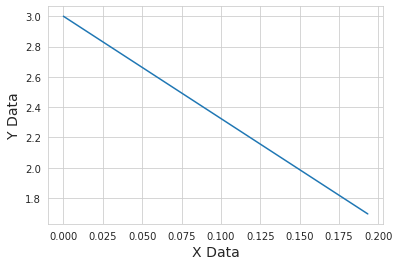

In [10]:
### Make some random linear data (X,Y). Plot it.
xdata=np.random.randn()*np.arange(0,10,0.5)
ydata=np.random.randn()*np.arange(0,10,0.5)+3.0
plt.plot(xdata,ydata);
plt.xlabel('X Data',fontsize=14);
plt.ylabel('Y Data',fontsize=14);

In [11]:
### Calculate the correlation statistics - direct (and fast) way
### Shows calculation using equations in Barnes notes (Chapter 2)

## calculate anomaly (i.e., subtract the mean)
xdata_anom=xdata-np.mean(xdata)
ydata_anom=ydata-np.mean(ydata)

## calculate the variance and covariance
variancex=np.sum((xdata_anom*xdata_anom))
variancey=np.sum((ydata_anom*ydata_anom))
covariance=np.dot(xdata_anom,ydata_anom)

## calculate the slope, the y-intercept, and the correlation coefficient
slope_direct=covariance/variancex                            ##Barnes Chapter 2, Eq. (14)
intercept_direct=np.mean(ydata)-slope_direct*np.mean(xdata)  ##Barnes Chapter 2, Eq. (15)
rvalue_direct=np.dot(xdata_anom,ydata_anom)/(np.sqrt(variancex)*np.sqrt(variancey)) ##Barnes Chapter 2, Eq. (31)

## print values
print('direct method slope_direct: ',round(slope_direct,3))
print('direct method intercept_direct: ',round(intercept_direct,3))
print('direct method rvalue_direct: ',round(rvalue_direct,3))

direct method slope_direct:  -6.75
direct method intercept_direct:  3.0
direct method rvalue_direct:  -1.0


In [12]:
### Calculate the correlation statistics using stats.linregress (python function)
## slow way, but convenient, answers should be the same...

slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)
print('scipy.stats.linregress slope: ',round(slope,3))
print('scipy.stats.linregress intercept: ',round(intercept,3))
print('scipy.stats.linregress r_value: ',round(r_value,3))

scipy.stats.linregress slope:  -6.75
scipy.stats.linregress intercept:  3.0
scipy.stats.linregress r_value:  -1.0


##**LINEAR REGRESSION with real data**##

####STEP 1: Read in the data

In [15]:
# PLEASE MAKE SURE YOU ARE USING GOOGLE CHROME as your browser, otherwise it may not load the file
# click on "Choose Files" to upload class_grades_detailed_anonymous.csv
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving class_grades_detailed_anonymous.csv to class_grades_detailed_anonymous.csv
User uploaded file "class_grades_detailed_anonymous.csv" with length 6886 bytes


In [16]:
filename = 'class_grades_detailed_anonymous.csv'
data=pd.read_csv(filename,sep=',')
print(data)

             ID  homework  midterm1  midterm2  final  clicker  finalgrade
0    student100        90      62.5     35.00  50.00        5          71
1    student101         3      40.0     41.67  41.67        0          26
2    student102        95      57.5     42.50  51.67        0          69
3    student103        93      57.5     42.50  65.00        0          70
4    student104        32      37.5     45.00  45.00        0          38
..          ...       ...       ...       ...    ...      ...         ...
206  student306        99      90.0     97.50  98.33        5         102
207  student307       100      97.5     97.50  90.00        5         102
208  student308       100     100.0     97.50  93.33        5         103
209  student309       100      97.5     97.50  98.33        5         104
210  student310        97      97.5    100.00  96.67        5         103

[211 rows x 7 columns]


####STEP 2: Choose X (predictor, independent variable) and Y (dependent variable, predicted).  Then, make a scatter plot to see if these data may be well described by linear regression. **Is there potential for X to be used to predict Y?**

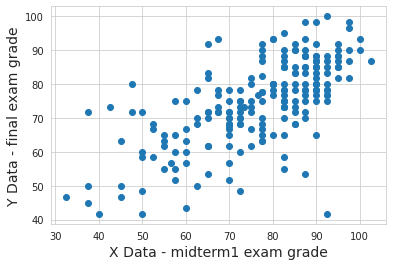

In [19]:
### Assign X and Y data
### Here, we are using midterm1 grade (X) to predict the final exam grade (Y)
xdata=data['midterm1'] ## predictor, independent variable
ydata=data['final'] ## predicted by predictor, dependent variable; y=f(x)
N=len(xdata)
plt.scatter(xdata,ydata);
plt.xlabel('X Data - midterm1 exam grade',size=14);
plt.ylabel('Y Data - final exam grade',size=14);

####STEP 3: Compute the linear regression and associated statistics

In [20]:
### Calculate the correlation statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)
print('scipy.stats.linregress slope or regression coefficient: ',round(slope,2))
print('scipy.stats.linregress y-intercept: ',round(intercept,2))
print('scipy.stats.linregress r_value or correlation coefficient: ',round(r_value,2))


scipy.stats.linregress slope or regression coefficient:  0.57
scipy.stats.linregress y-intercept:  31.29
scipy.stats.linregress r_value or correlation coefficient:  0.66


#### STEP 4: Use hypothesis testing to evaluate if the true correlation between X and Y is significant.


1.   **State the sigificance level:** alpha=0.05 (95% confidence)
2.   **State the null hypothesis (H0):** The true correlation between X and Y is positive. 
     
     In other words, a high midterm1 grade leads to a high final exam grade.
3.   **State the statistic to be used, and the assumptions:** 
      
      Use Fisher-Z because the null hypothesis is that the true correlation is positive.  We will use the t-statistic following Equations 46-50 in the Barnes Notes (Example 2.2).  The t-statistic converges to the z-statistic for large N.  The t-statistic requires an assumption of an underlying normal distribution. 

4.    **State the critical region:** Results will be consistent with the null hypothesis if the 95% confidence intervals on the true correlation are positive.

5.    **Evaluate the statistic and state the conclusion (see code below)**


In [35]:
## 5. Evaluate the statistic and state the conclusion

## Use Fisher-Z to calculate Z, sigma_Z
Z=0.5*np.log((1+r_value)/(1-r_value))
print('Z:',round(Z,2))
sigma_Z=1/np.sqrt(N-3)
print('sigma_Z:',round(sigma_Z,2))

## Find 95% confidence intervals on the true correlation.
print('Number of students:',N)
tstat95=stats.t.ppf(0.975,N-3)  ## two-sided 95%
min_Z_value=Z-tstat95*sigma_Z
max_Z_value=Z+tstat95*sigma_Z
min_r_value=np.tanh(min_Z_value)
max_r_value=np.tanh(max_Z_value)

print('r_value:',round(r_value,2))
print('min_r_value:',round(min_r_value,2))
print('max_r_value:',round(max_r_value,2))
print('')
if 0 < min_r_value < max_r_value:
  print('CONCLUSION: Cannot reject null hypothesis:')
  print('95% confidence bounds rule out correlation=0')
  print('Results consistent with high midterm 1 grade leading to a high final exam grade.')
else:
  print('CONCLUSION: Reject the null hypothesis')
  print('Results are not consistent high midterm 1 grade leading to a high final exam grade.')


Z: 0.8
sigma_Z: 0.07
Number of students: 211
r_value: 0.66
min_r_value: 0.58
max_r_value: 0.73

CONCLUSION: Cannot reject null hypothesis:
95% confidence bounds rule out correlation=0
Results consistent with high midterm 1 grade leading to a high final exam grade.
